In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the pollution_dataset
traffic_data = pd.read_csv("traffic-volume-survey.csv")


In [4]:
traffic_data.head()

,geo_point_2d,geo_shape,latitude,longitude,road_name,installed_year,range,type,date,easting,...,projection,postcode,pc85th_kmh,volume_12h,volume_24h,comm_vhcl,peakvol,suburb_name,ward_name,gisfid
0,"-38.1216300043, 145.2924700205","{""coordinates"": [145.2924700205, -38.121630004...",-38.121630,145.292470,ANNABELLA STREET,2022,Between 50km/h and 60km/h,W,2022-08-24,350326,...,MGA2020 zone 55,3977,50.5,546,658,3.15,10.27,CRANBOURNE EAST,BALLA BALLA,506
1,"-38.0790430044, 145.3301540239","{""coordinates"": [145.3301540239, -38.079043004...",-38.079043,145.330154,ALISMA BOULEVARD,2022,Between 50km/h and 60km/h,W,2022-08-24,353544,...,MGA2020 zone 55,3977,56.8,2790,3708,2.72,10.85,CRANBOURNE NORTH,SPRINGFIELD,514
2,"-38.0973230017, 145.2458930241","{""coordinates"": [145.2458930241, -38.097323001...",-38.097323,145.245893,QUARTERS BOULEVARD,2022,Less than 30km/h,W,2022-08-24,346192,...,MGA2020 zone 55,3977,27.0,368,402,3.24,16.79,CRANBOURNE WEST,MAYFIELD,517
3,"-37.9748000045, 145.2722920164","{""coordinates"": [145.2722920164, -37.974800004...",-37.974800,145.272292,HANNA DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348254,...,MGA2020 zone 55,3802,54.2,3661,4293,6.00,21.70,ENDEAVOUR HILLS,FOUR OAKS,520
4,"-38.0443360031, 145.2755090228","{""coordinates"": [145.2755090228, -38.044336003...",-38.044336,145.275509,CORAL DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348680,...,MGA2020 zone 55,3976,50.0,3244,4017,4.39,11.94,HAMPTON PARK,RIVER GUM,524


In [5]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   geo_point_2d    1319 non-null   object 
 1   geo_shape       1319 non-null   object 
 2   latitude        1319 non-null   float64
 3   longitude       1319 non-null   float64
 4   road_name       1319 non-null   object 
 5   installed_year  1319 non-null   int64  
 6   range           1319 non-null   object 
 7   type            1319 non-null   object 
 8   date            1319 non-null   object 
 9   easting         1319 non-null   int64  
 10  northing        1319 non-null   int64  
 11  projection      1319 non-null   object 
 12  postcode        1319 non-null   int64  
 13  pc85th_kmh      1319 non-null   float64
 14  volume_12h      1319 non-null   int64  
 15  volume_24h      1319 non-null   int64  
 16  comm_vhcl       1319 non-null   float64
 17  peakvol         1319 non-null   f

In [6]:
traffic_data.describe()

,latitude,longitude,installed_year,easting,northing,postcode,pc85th_kmh,volume_12h,volume_24h,comm_vhcl,peakvol,gisfid
count,1319.000000,1319.000000,1319.000000,1319.000000,1.319000e+03,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,-38.066795,145.299181,2020.812737,350802.561789,5.785409e+06,3875.510235,51.968302,2038.299469,2584.727066,6.465360,38.900394,660.000000
std,0.054116,0.037674,1.854484,3321.597179,5.997133e+03,158.697572,10.791928,2529.950321,3258.954428,5.277923,145.615733,380.906813
min,-38.225106,145.226599,2018.000000,344695.000000,5.767858e+06,3156.000000,15.000000,0.000000,11.000000,0.000000,1.160000,1.000000
25%,-38.102350,145.265858,2019.000000,347870.500000,5.781410e+06,3805.000000,46.250000,380.500000,489.000000,3.390000,9.785000,330.500000
50%,-38.067303,145.298021,2021.000000,350701.000000,5.785355e+06,3975.000000,51.800000,1096.000000,1398.000000,4.880000,11.140000,660.000000
75%,-38.029082,145.329194,2022.000000,353396.500000,5.789626e+06,3977.000000,57.000000,2676.000000,3322.500000,7.500000,13.935000,989.500000
max,-37.950574,145.412960,2024.000000,361050.000000,5.798223e+06,3981.000000,102.000000,28264.000000,39101.000000,42.200000,2978.000000,1319.000000


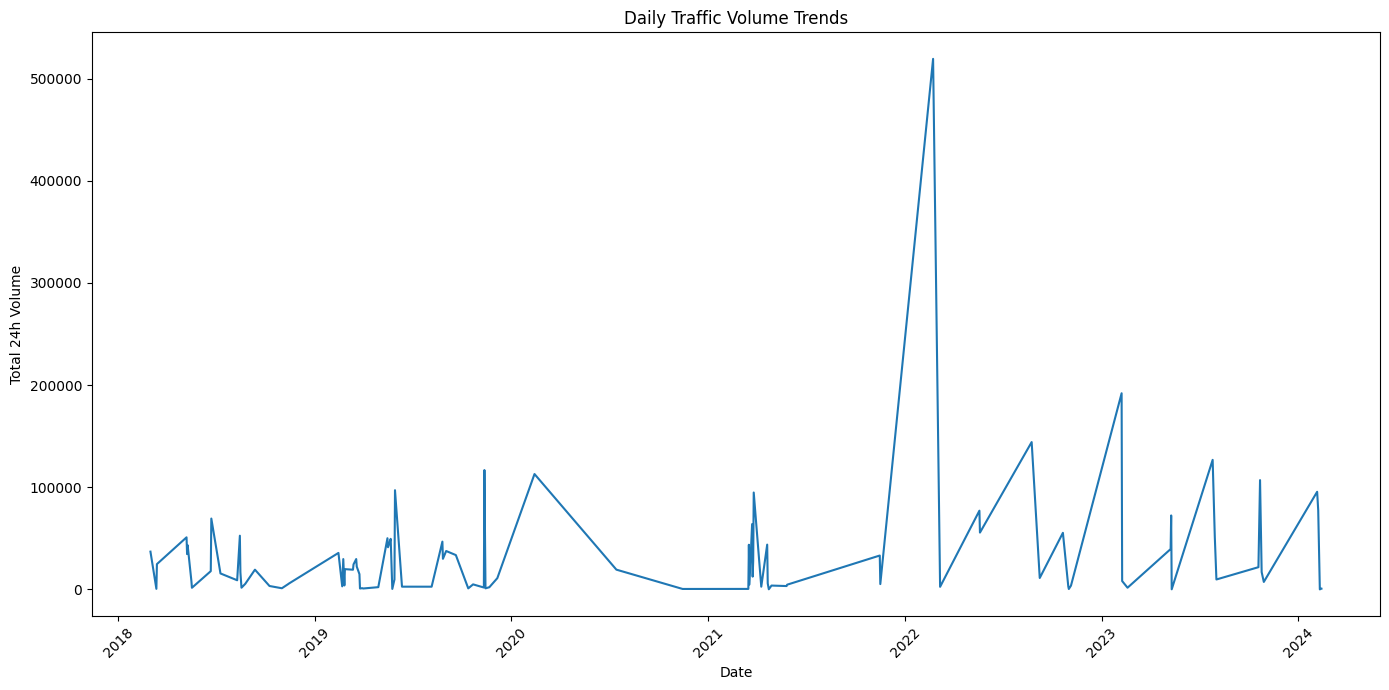

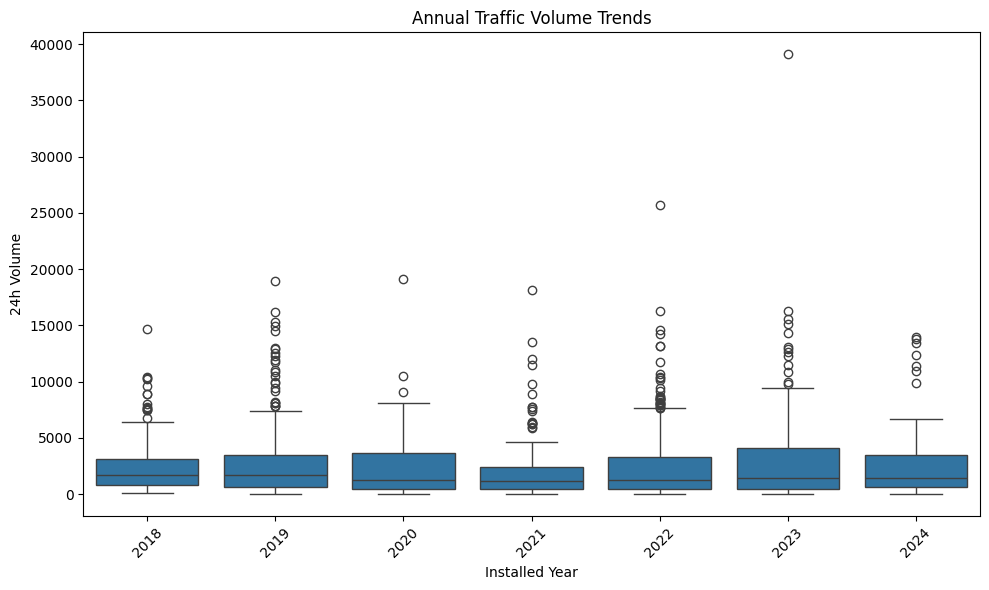

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime format
traffic_data['date'] = pd.to_datetime(traffic_data['date'])

# Creating a new dataframe for trend analysis
trend_analysis_df = traffic_data.groupby('date').agg({'volume_24h':'sum'}).reset_index()

# Plotting traffic volume over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='volume_24h', data=trend_analysis_df)
plt.title('Daily Traffic Volume Trends')
plt.xlabel('Date')
plt.ylabel('Total 24h Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting traffic volume by installed year
plt.figure(figsize=(10, 6))
sns.boxplot(x='installed_year', y='volume_24h', data=traffic_data)
plt.title('Annual Traffic Volume Trends')
plt.xlabel('Installed Year')
plt.ylabel('24h Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


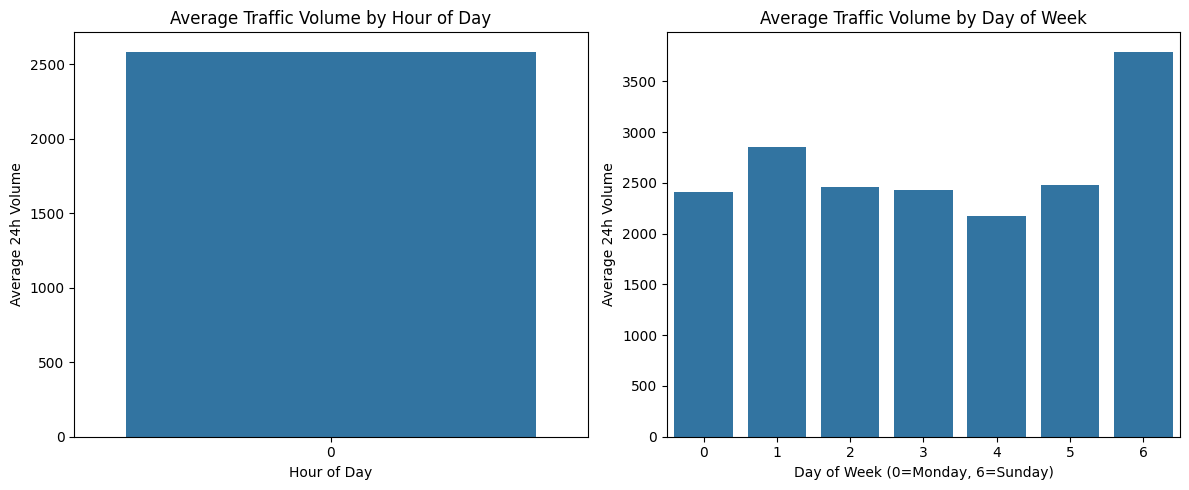

In [8]:
# Adding a day of the week column (Monday=0, Sunday=6)
traffic_data['day_of_week'] = traffic_data['date'].dt.dayofweek

# Summarizing daily and weekly patterns
# For daily patterns, using 'volume_24h' as a proxy for overall traffic
daily_volume_summary = traffic_data.groupby(traffic_data['date'].dt.hour).agg({'volume_24h':'mean'}).reset_index()

# For weekly patterns, analyzing the 'volume_24h' across different days of the week
weekly_volume_summary = traffic_data.groupby('day_of_week').agg({'volume_24h':'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='date', y='volume_24h', data=daily_volume_summary)
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average 24h Volume')

plt.subplot(1, 2, 2)
sns.barplot(x='day_of_week', y='volume_24h', data=weekly_volume_summary)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average 24h Volume')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime

# Parse the 'date' column to datetime format (ignoring time for now as it's not explicitly given)
traffic_data['date'] = pd.to_datetime(traffic_data['date'], format='%Y-%m-%d')

# For simplicity, let's drop rows with any missing values in the key columns mentioned
# (In a real-world scenario, we might want to impute these instead)
cleaned_data = traffic_data.dropna(subset=['latitude', 'longitude', 'volume_24h'])

# Encode categorical variables ('type' and 'road_name')
# Note: For a large number of unique road names, consider other encoding methods or feature engineering
label_encoder = LabelEncoder()
cleaned_data['type_encoded'] = label_encoder.fit_transform(cleaned_data['type'])
# Road names might have too many categories, simplifying by not including it in the model for now

# Prepare features and target variable
X = cleaned_data[['latitude', 'longitude', 'type_encoded']]
y = cleaned_data['volume_24h']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training/testing sets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1055, 3), (264, 3), (1055,), (264,))

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(2070.539931096682, 0.11351006598829771)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Extract day of the week (0=Monday, 6=Sunday)
cleaned_data['day_of_week'] = cleaned_data['date'].dt.dayofweek

# Prepare the features with the new 'day_of_week'
features = ['latitude', 'longitude', 'type_encoded', 'day_of_week']
X_enhanced = cleaned_data[features]

# Encode 'day_of_week' using one-hot encoding because it's a nominal categorical variable
column_transformer = ColumnTransformer([('day_of_week_encoder', OneHotEncoder(), ['day_of_week'])], remainder='passthrough')
X_enhanced_transformed = column_transformer.fit_transform(X_enhanced)

# Split the enhanced dataset into training and testing sets
X_train_enhanced, X_test_enhanced, y_train, y_test = train_test_split(X_enhanced_transformed, y, test_size=0.2, random_state=42)

# Re-train the Random Forest model with the enhanced features
rf_model_enhanced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_enhanced.fit(X_train_enhanced, y_train)

# Predict on the enhanced testing set
y_pred_enhanced = rf_model_enhanced.predict(X_test_enhanced)

# Evaluate the enhanced model
mae_enhanced = mean_absolute_error(y_test, y_pred_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced)

mae_enhanced, r2_enhanced


(1947.2711250000002, 0.17769177890542587)

In [12]:
import joblib

# Assuming rf_model_enhanced is your trained Random Forest model
model_filename = 'D:/600/traffic_model.pkl'  # Adjust path as needed
joblib.dump(rf_model_enhanced, model_filename)

['D:/600/traffic_model.pkl']

In [13]:
import sklearn
print(sklearn.__version__)


1.4.2
